# Stats regarding the samples in the CEL, their MR parameters and how they relate to pathological outcome: 

In [29]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

## First read in the data: 

In [36]:
recgli = read.csv("/home/sf673542/MultiParametricMRI/MP_MRI_Final/AnnotateData/recgli_annotation10_onlyGoodBiopsies_alt1.csv")
colnames(recgli)
dim(recgli)

[1] "vialid"                           "b_number"                        
 [3] "t_number_x"                       "t_number_y"                      
 [5] "sf_number"                        "current_scan_date"               
 [7] "current_surgery_date"             "current_hist_grade"              
 [9] "current_hist_type"                "tumor_cell_evaluation"           
[11] "necrosis"                         "mv_hyperplasia"                  
[13] "mv_delicate_vasculature"          "f8_delicate"                     
[15] "f8_simple"                        "f8_complex"                      
[17] "mib_1"                            "avgerage_cells"                  
[19] "treatment_related_ab"             "bx_pure_treatment_effect"        
[21] "percent_tumor_nuclei"             "nfl"                             
[23] "nfse"                             "nt1c"                            
[25] "nt1v"                             "nt1d"                            
[27] "nadc.1"                           "nfa.1"                           
[29] "nev1.1"                           "nev2.1"                          
[31] "nev3.1"                           "nevrad.1"                        
[33] "nadc.2"                           "nfa.2"                           
[35] "nev1.2"                           "nev2.2"                          
[37] "nev3.2"                           "nevrad.2"                        
[39] "cbvn_nlin"                        "phn_nlin"                        
[41] "recov_nlin"                       "phn_npar"                        
[43] "recov_npar"                       "recovn_npar"                     
[45] "ccri"                             "cni"                             
[47] "crni"                             "ncho"                            
[49] "ncre"                             "nnaa"                            
[51] "nlac"                             "nlip"                            
[53] "newdata"                          "olddata"                         
[55] "exclude_bc_hematoma_or_ventricle" "exclude_perf"                    
[57] "nLL"                              "comments"                        
[59] "perf_quant"                       "include_perf"                    
[61] "spec_quant"                       "include_spec"                    
[63] "diffu1000_quant"                  "diffu2000_quant"                 
[65] "exclude_bc_anat"                  "exclude_bc_pathology"            
[67] "include_diffu1000"                "include_diffu2000"               
[69] "exclude_histology"                "txe_comments"                    
[71] "outcome"                          "in_CEL"                          
[73] "in_T2all"                         "in_NEL"                          
[75] "CELorNEL"

[1] 367  75

In [53]:
recgli = droplevels.data.frame(recgli)

In [38]:
recgli = recgli[recgli$CELorNEL == "CEL",]

In [39]:
dim(recgli[recgli$outcome=="txe",])
dim(recgli[recgli$outcome=="rHGG",])

[1] 37 75

[1] 132  75

## Anatomical numbers: 

In [48]:
table(recgli$outcome)


rHGG  txe  unk 
 132   37   33 

In [51]:
print('there are ')
print(length(unique(recgli$t_number_y[recgli$outcome == "txe" | recgli$outcome == "rHGG"])))
print('patients contributing to this CEL cohort')

[1] "there are "
[1] 99
[1] "patients contributing to this CEL cohort"


In [54]:
recgli = droplevels.data.frame(recgli)

In [55]:
table(recgli$outcome, recgli$CELorNEL)

      
       CEL
  rHGG 132
  txe   37
  unk   33

## Diffusion numbers: 

In [56]:
recgli_diffu = recgli[!is.na(recgli$nadc.1),]

In [57]:
table(recgli_diffu$outcome)
length(unique(recgli_diffu$t_number_y[recgli_diffu$outcome == "txe" | recgli_diffu$outcome == "rHGG"]))


rHGG  txe  unk 
 128   33   29 

[1] 93

## Perfusion numbers: 

In [58]:
recgli_perf = recgli[!is.na(recgli$cbvn_nlin),]

In [59]:
table(recgli_perf$outcome)
length(unique(recgli_perf$t_number_y[recgli_perf$outcome == "txe" | recgli_perf$outcome == "rHGG"]))


rHGG  txe  unk 
  90   18   29 

[1] 69

## Spectroscopy numbers: 


In [60]:
recgli_spec = recgli[!is.na(recgli$cni),]

In [61]:
table(recgli_spec$outcome)
length(unique(recgli_spec$t_number_y[recgli_spec$outcome == "txe" | recgli_spec$outcome == "rHGG"]))


rHGG  txe  unk 
  72   13   14 

[1] 58

In [62]:
## Now let's subset down to JUST rHGG & TxE
recgli = recgli[which(recgli$outcome == "txe" | recgli$outcome=="rHGG"), ]
dim(recgli)

[1] 169  75

In [63]:
table(recgli$outcome, is.na(recgli$nadc.1))

      
       FALSE TRUE
  rHGG   128    4
  txe     33    4
  unk      0    0

In [64]:
recgli = droplevels.data.frame(recgli)

## First -- visualization: 

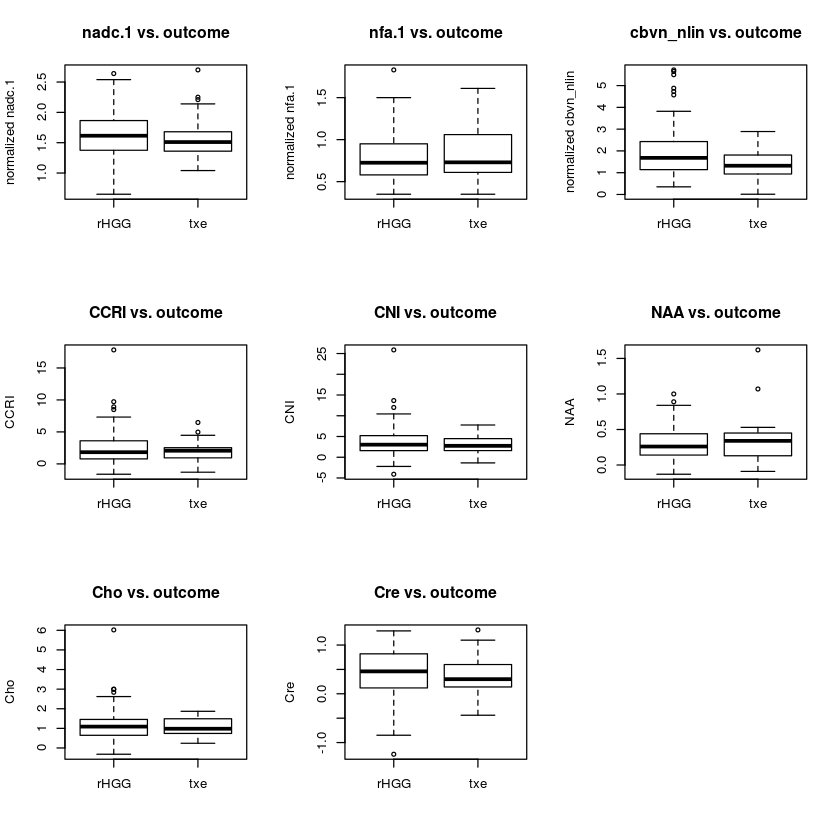

In [75]:
## Let's look at the differences among parameters: 
par(mfrow = c(3,3))
a = boxplot(nadc.1 ~ outcome , data = recgli, ylab = "normalized nadc.1",  main = 'nadc.1 vs. outcome')
b = boxplot(nfa.1 ~ outcome , data = recgli, ylab = "normalized nfa.1",  main = 'nfa.1 vs. outcome')
a = boxplot(cbvn_nlin ~ outcome , data = recgli, ylab = "normalized cbvn_nlin",  main = 'cbvn_nlin vs. outcome')
a = boxplot(ccri ~ outcome , data = recgli, ylab = "CCRI", main = 'CCRI vs. outcome')
a = boxplot(cni ~ outcome , data = recgli, ylab = "CNI", main = 'CNI vs. outcome')
a = boxplot(nnaa ~ outcome , data = recgli, ylab = "NAA", main = 'NAA vs. outcome')
a = boxplot(ncho ~ outcome , data = recgli, ylab = "Cho", main = 'Cho vs. outcome')
a = boxplot(ncre ~ outcome , data = recgli, ylab = "Cre", main = 'Cre vs. outcome')

## Second -- Stats: 

In [65]:
library(lme4)
library(geepack)
library(glmm)


In [66]:
recgli$txe_rhgg = ifelse(recgli$outcome=="txe", 0, 1)
colnames(recgli)

[1] "vialid"                           "b_number"                        
 [3] "t_number_x"                       "t_number_y"                      
 [5] "sf_number"                        "current_scan_date"               
 [7] "current_surgery_date"             "current_hist_grade"              
 [9] "current_hist_type"                "tumor_cell_evaluation"           
[11] "necrosis"                         "mv_hyperplasia"                  
[13] "mv_delicate_vasculature"          "f8_delicate"                     
[15] "f8_simple"                        "f8_complex"                      
[17] "mib_1"                            "avgerage_cells"                  
[19] "treatment_related_ab"             "bx_pure_treatment_effect"        
[21] "percent_tumor_nuclei"             "nfl"                             
[23] "nfse"                             "nt1c"                            
[25] "nt1v"                             "nt1d"                            
[27] "nadc.1"                           "nfa.1"                           
[29] "nev1.1"                           "nev2.1"                          
[31] "nev3.1"                           "nevrad.1"                        
[33] "nadc.2"                           "nfa.2"                           
[35] "nev1.2"                           "nev2.2"                          
[37] "nev3.2"                           "nevrad.2"                        
[39] "cbvn_nlin"                        "phn_nlin"                        
[41] "recov_nlin"                       "phn_npar"                        
[43] "recov_npar"                       "recovn_npar"                     
[45] "ccri"                             "cni"                             
[47] "crni"                             "ncho"                            
[49] "ncre"                             "nnaa"                            
[51] "nlac"                             "nlip"                            
[53] "newdata"                          "olddata"                         
[55] "exclude_bc_hematoma_or_ventricle" "exclude_perf"                    
[57] "nLL"                              "comments"                        
[59] "perf_quant"                       "include_perf"                    
[61] "spec_quant"                       "include_spec"                    
[63] "diffu1000_quant"                  "diffu2000_quant"                 
[65] "exclude_bc_anat"                  "exclude_bc_pathology"            
[67] "include_diffu1000"                "include_diffu2000"               
[69] "exclude_histology"                "txe_comments"                    
[71] "outcome"                          "in_CEL"                          
[73] "in_T2all"                         "in_NEL"                          
[75] "CELorNEL"                         "txe_rhgg"

In [67]:
print('ANATOMICAL:')
print('nfse glmm')
nfse.glmm.fit = glmer(outcome ~ nfse + (1|t_number_y), data = recgli, family="binomial")
round(summary(nfse.glmm.fit)$coefficients, 4) 
print('nfse gee')
nfse.gee.fit = geeglm(txe_rhgg ~ nfse, data = recgli, id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nfse.gee.fit)$coefficients, 4)
print('nfl')
nfl.glmm.fit = glmer(outcome ~ nfl + (1|t_number_y), data = recgli, family="binomial")
round(summary(nfl.glmm.fit)$coefficients, 4) 
print('nfl gee')
nfl.gee.fit = geeglm(txe_rhgg ~ nfl, data = recgli, id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nfl.gee.fit)$coefficients, 4)
print('nt1v')
nt1v.glmm.fit = glmer(outcome ~ nt1v + (1|t_number_y), data = recgli, family="binomial")
round(summary(nt1v.glmm.fit)$coefficients, 4) 
print('nt1v gee')
nt1v.gee.fit = geeglm(txe_rhgg ~ nt1v, data = recgli[!is.na(recgli$nt1v),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nt1v.gee.fit)$coefficients, 4)
print('nt1c')
nt1c.glmm.fit = glmer(outcome ~ nt1c + (1|t_number_y), data = recgli, family="binomial")
round(summary(nt1c.glmm.fit)$coefficients, 4) 
print('nt1c gee')
nt1c.gee.fit = geeglm(txe_rhgg ~ nt1c, data = recgli, id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nt1c.gee.fit)$coefficients, 4)
print('nt1d')
nt1d.glmm.fit = glmer(outcome ~ nt1d + (1|t_number_y), data = recgli, family="binomial")
round(summary(nt1d.glmm.fit)$coefficients, 4) 
print('nt1d gee')
nt1d.gee.fit = geeglm(txe_rhgg ~ nt1d, data = recgli[!is.na(recgli$nt1d),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nt1d.gee.fit)$coefficients, 4)

[1] "ANATOMICAL:"
[1] "nfse glmm"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.8492,3.3068,-3.2809,0.0010
nfse,0.4257,1.5553,0.2737,0.7843


[1] "nfse gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.8887,0.6176,9.3527,0.0022
nfse,-0.3492,0.2828,1.5245,0.2169


[1] "nfl"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.0022,3.9975,-2.5021,0.0123
nfl,-0.0415,2.2077,-0.0188,0.9850


[1] "nfl gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.9832,0.8608,5.3084,0.0212
nfl,-0.4417,0.4761,0.8607,0.3535


[1] "nt1v"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.1702,3.9007,-2.6073,0.0091
nt1v,0.2649,4.2775,0.0619,0.9506


[1] "nt1v gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.5526,0.7802,3.9604,0.0466
nt1v,-0.3183,0.8606,0.1368,0.7115


[1] "nt1c"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-14.0069,3.6099,-3.8801,0.0001
nt1c,1.9624,1.4338,1.3686,0.1711


[1] "nt1c gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.4384,0.5620,6.5518,0.0105
nt1c,-0.1352,0.2926,0.2135,0.6440


[1] "nt1d"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-11.7220,2.4875,-4.7123,0.0000
nt1d,1.7376,1.3815,1.2577,0.2085


[1] "nt1d gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.3688,0.2427,31.8096,0.0000
nt1d,-0.1840,0.0680,7.3122,0.0068


In [68]:
nt1d.gee.fit = geeglm(txe_rhgg ~ nt1d, 
                      data = recgli[!is.na(recgli$nt1d),], 
                      id = factor(t_number_y), 
                      family = binomial, corstr = "exchangeable")


In [69]:
print('Diffusion:')
print('nadc.1')
nadc.1.glmm.fit = glmer(outcome ~ nadc.1 + (1|t_number_y), data = recgli, family="binomial")
round(summary(nadc.1.glmm.fit)$coefficients, 4) 
print('nadc.1 gee')
nadc.1.gee.fit = geeglm(txe_rhgg ~ nadc.1, data = recgli[!is.na(recgli$nadc.1),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nadc.1.gee.fit)$coefficients, 4)
print('nfa.1')
nfa.1.glmm.fit = glmer(outcome ~ nfa.1 + (1|t_number_y), data = recgli, family="binomial")
round(summary(nfa.1.glmm.fit)$coefficients, 4) 
print('nfa.1 gee')
nfa.1.gee.fit = geeglm(txe_rhgg ~ nfa.1, data = recgli[!is.na(recgli$nfa.1),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nfa.1.gee.fit)$coefficients, 4)
print('nev1.1')
nev1.1.glmm.fit = glmer(outcome ~ nev1.1 + (1|t_number_y), data = recgli, family="binomial")
round(summary(nev1.1.glmm.fit)$coefficients, 4) 
print('nev1.1 gee')
nev1.1.gee.fit = geeglm(txe_rhgg ~ nev1.1, data = recgli[!is.na(recgli$nev1.1),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nev1.1.gee.fit)$coefficients, 4)
print('nev2.1')
nev2.1.glmm.fit = glmer(outcome ~ nev2.1 + (1|t_number_y), data = recgli, family="binomial")
round(summary(nev2.1.glmm.fit)$coefficients, 4) 
print('nev2.1 gee')
nev2.1.gee.fit = geeglm(txe_rhgg ~ nev2.1, data = recgli[!is.na(recgli$nev2.1),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nev2.1.gee.fit)$coefficients, 4)
print("nevrad.1")
nevrad.1.glmm.fit = glmer(outcome ~ nevrad.1 + (1|t_number_y), data = recgli, family="binomial")
round(summary(nevrad.1.glmm.fit)$coefficients, 4) 
print('nevrad.1 gee')
nevrad.1.gee.fit = geeglm(txe_rhgg ~ nevrad.1, data = recgli[!is.na(recgli$nevrad.1),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nevrad.1.gee.fit)$coefficients, 4)

[1] "Diffusion:"
[1] "nadc.1"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-11.4928,4.5230,-2.5409,0.0111
nadc.1,0.8267,2.3272,0.3552,0.7224


[1] "nadc.1 gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.2306,0.6757,3.3163,0.0686
nadc.1,0.0406,0.3938,0.0106,0.9178


[1] "nfa.1"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.0113,2.3729,-4.2191,0.0000
nfa.1,-0.0367,2.3679,-0.0155,0.9876


[1] "nfa.1 gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.2009,0.4367,7.564,0.0060
nfa.1,0.1144,0.4490,0.065,0.7988


[1] "nev1.1"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.6585,4.9893,-2.1363,0.0327
nev1.1,0.1937,3.4492,0.0561,0.9552


[1] "nev1.1 gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.1693,0.7386,2.5063,0.1134
nev1.1,0.1401,0.5372,0.0680,0.7942


[1] "nev2.1"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-11.3870,4.8622,-2.3419,0.0192
nev2.1,0.6326,2.8214,0.2242,0.8226


[1] "nev2.1 gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.0442,0.6833,2.3353,0.1265
nev2.1,0.2158,0.4489,0.2310,0.6308


[1] "nevrad.1"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-11.5673,4.7816,-2.4191,0.0156
nevrad.1,0.7502,2.7520,0.2726,0.7852


[1] "nevrad.1 gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.1341,0.6855,2.7376,0.0980
nevrad.1,0.1539,0.4539,0.1150,0.7345


In [70]:
table(recgli$outcome)


rHGG  txe 
 128   36 

In [73]:
library("BBmisc")

In [79]:
for (col in c('cbvn_nlin', 'phn_npar', 'recov_npar')){
    recgli[,col] = normalize(recgli[,col], method = "standardize")
}

In [80]:
print('Perfusion:')
print(perf)
print('cbvn_nlin')
cbvn_nlin.glmm.fit = glmer(outcome ~ cbvn_nlin + (1|t_number_y), data = recgli, family="binomial")
round(summary(cbvn_nlin.glmm.fit)$coefficients, 4) 
print('cbvn_nlin gee')
cbvn_nlin.gee.fit = geeglm(txe_rhgg ~ cbvn_nlin, data = recgli[!is.na(recgli$cbvn_nlin),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(cbvn_nlin.gee.fit)$coefficients, 4)
print('phn_nlin')
phn_nlin.glmm.fit = glmer(outcome ~phn_nlin + (1|t_number_y), data = recgli, family="binomial")
round(summary(phn_nlin.glmm.fit)$coefficients, 4) 
print('phn_nlin gee')
phn_nlin.gee.fit = geeglm(txe_rhgg ~ phn_nlin, data = recgli[!is.na(recgli$phn_nlin),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(phn_nlin.gee.fit)$coefficients, 4)
print('recov_nlin')
recov_nlin.glmm.fit = glmer(outcome ~ recov_nlin + (1|t_number_y), data = recgli, family="binomial")
round(summary(recov_nlin.glmm.fit)$coefficients, 4) 
print('recov_nlin gee')
recov_nlin.gee.fit = geeglm(txe_rhgg ~ recov_nlin, data = recgli[!is.na(recgli$recov_nlin),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(recov_nlin.gee.fit)$coefficients, 4)
print('phn_npar')
phn_npar.glmm.fit = glmer(outcome ~ phn_npar + (1|t_number_y), data = recgli, family="binomial")
round(summary(phn_npar.glmm.fit)$coefficients, 4) 
print('phn_npar gee')
phn_npar.gee.fit = geeglm(txe_rhgg ~ phn_npar, data = recgli[!is.na(recgli$phn_npar),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(phn_npar.gee.fit)$coefficients, 4)
print("recov_npar")
recov_npar.glmm.fit = glmer(outcome ~ recov_npar + (1|t_number_y), data = recgli, family="binomial")
round(summary(recov_npar.glmm.fit)$coefficients, 4) 
print('recov_npar gee')
recov_npar.gee.fit = geeglm(txe_rhgg ~ recov_npar, data = recgli[!is.na(recgli$recov_npar),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(recov_npar.gee.fit)$coefficients, 4)

[1] "Perfusion:"
[1] "cbvn_nlin"  "phn_nlin"   "recov_nlin" "phn_npar"   "recov_npar"
[1] "cbvn_nlin"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.6092,2.7865,-4.5250,0.000
cbvn_nlin,-0.8577,2.4572,-0.3491,0.727


[1] "cbvn_nlin gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.5342,0.3062,25.1086,0.0000
cbvn_nlin,0.3615,0.1224,8.7248,0.0031


[1] "phn_nlin"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-11.3765,3.9463,-2.8828,0.0039
phn_nlin,-0.7250,2.3266,-0.3116,0.7553


[1] "phn_nlin gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),0.9174,0.3723,6.0722,0.0137
phn_nlin,0.3670,0.1244,8.7000,0.0032


[1] "recov_nlin"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.0727,2.7065,-1.1353,0.2562
recov_nlin,-0.1363,0.0533,-2.5597,0.0105


[1] "recov_nlin gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),-0.5060,0.6989,0.5242,0.4690
recov_nlin,0.0256,0.0079,10.4180,0.0012


[1] "phn_npar"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.5161,2.6166,-4.7834,0.0000
phn_npar,-0.3749,1.8552,-0.2021,0.8399


[1] "phn_npar gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.4837,0.3075,23.2859,0.0000
phn_npar,0.2275,0.1003,5.1495,0.0233


[1] "recov_npar"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.5065,2.6652,-4.6925,0.0000
recov_npar,-0.6496,1.3652,-0.4758,0.6342


[1] "recov_npar gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.5907,0.3164,25.2781,0.0000
recov_npar,0.5320,0.2033,6.8494,0.0089


In [72]:
print('Spec:')
print(spec)
print('ccri')
ccri.glmm.fit = glmer(outcome ~ ccri + (1|t_number_y), data = recgli, family="binomial")
round(summary(ccri.glmm.fit)$coefficients, 4) 
print('ccri gee')
ccri.gee.fit = geeglm(txe_rhgg ~ ccri, data = recgli[!is.na(recgli$ccri),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(ccri.gee.fit)$coefficients, 4)
#########################
print('cni')
cni.glmm.fit = glmer(outcome ~cni + (1|t_number_y), data = recgli, family="binomial")
round(summary(cni.glmm.fit)$coefficients, 4) 
print('cni gee')
cni.gee.fit = geeglm(txe_rhgg ~ cni, data = recgli[!is.na(recgli$cni),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(cni.gee.fit)$coefficients, 4)
#########################
print('crni')
crni.glmm.fit = glmer(outcome ~ crni + (1|t_number_y), data = recgli, family="binomial")
round(summary(crni.glmm.fit)$coefficients, 4) 
print('crni gee')
crni.gee.fit = geeglm(txe_rhgg ~ crni, data = recgli[!is.na(recgli$crni),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(crni.gee.fit)$coefficients, 4)
#########################


[1] "Spec:"
[1] "ccri" "cni"  "crni" "ncho" "ncre" "nnaa" "nlac" "nlip" "nLL" 
[1] "ccri"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.4277,3.4561,-3.5959,0.0003
ccri,-0.1159,0.8289,-0.1398,0.8888


[1] "ccri gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.6722,0.3633,21.1896,0.0000
ccri,0.0008,0.0005,2.6355,0.1045


[1] "cni"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.3697,3.5037,-3.5305,0.0004
cni,-0.0950,0.5929,-0.1602,0.8727


[1] "cni gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.6721,0.3633,21.1892,0.0000
cni,0.0006,0.0003,2.6232,0.1053


[1] "crni"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.6290,3.0668,-4.1180,0.0000
crni,-0.1903,1.3079,-0.1455,0.8843


[1] "crni gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.6737,0.3632,21.2307,0.0000
crni,0.0014,0.0014,1.0592,0.3034


In [41]:
ncho.glmm.fit = glmer(outcome ~ ncho + (1|t_number_y), data = recgli, family="binomial")
round(summary(ncho.glmm.fit)$coefficients, 4) 
print('ncho gee')
ncho.gee.fit = geeglm(txe_rhgg ~ ncho, data = recgli[!is.na(recgli$ncho),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(ncho.gee.fit)$coefficients, 4)
#########################
print('ncre')
ncre.glmm.fit = glmer(outcome ~ncre + (1|t_number_y), data = recgli, family="binomial")
round(summary(ncre.glmm.fit)$coefficients, 4) 
print('ncre gee')
ncre.gee.fit = geeglm(txe_rhgg ~ ncre, data = recgli[!is.na(recgli$ncre),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(ncre.gee.fit)$coefficients, 4)
#########################



,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.4239,4.0086,-3.0994,0.0019
ncho,-0.2398,2.4282,-0.0988,0.9213


[1] "ncho gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.6702,0.3634,21.1239,0.0000
ncho,0.0033,0.0023,2.0366,0.1536


[1] "ncre"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-12.8144,3.6655,-3.4960,0.0005
ncre,0.2350,3.9008,0.0602,0.9520


[1] "ncre gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.6747,0.3632,21.2562,0.000
ncre,-0.0014,0.0029,0.2148,0.643


In [42]:
print('nnaa')
# nnaa.glmm.fit = glmer(outcome ~ nnaa + (1|t_number_y), data = recgli[which(recgli$nnaa > 1),], family="binomial")
# round(summary(nnaa.glmm.fit)$coefficients, 4) 
print('nnaa gee')
recgli_nnaa = recgli[which((!is.na(recgli$nnaa)) & recgli$nnaa<1), ]
summary(recgli_nnaa$nnaa)
nnaa.gee.fit = geeglm(txe_rhgg ~ nnaa, data = recgli_nnaa, id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nnaa.gee.fit)$coefficients, 4)
#########################

[1] "nnaa"
[1] "nnaa gee"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1300  0.1375  0.2600  0.2949  0.4325  0.8900 

,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.7753,0.3847,21.2944,0.0000
nnaa,0.0585,0.1716,0.1164,0.7329


In [37]:
recgli[which(recgli$nnaa > 1),]

,vialid,b_number,t_number_x,t_number_y,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,tumor_cell_evaluation,⋯,include_diffu1000,include_diffu2000,exclude_histology,txe_comments,outcome,in_CEL,in_T2all,in_NEL,CELorNEL,txe_rhgg
10,68B91,4205,t10756,10756,11017,10/11/16,10/12/16,Treatment Effect,Treatment Effect,0,⋯,1,1,NA,True,txe,0,1,1,NEL,0
32,12D1,3737,t11482,11482,11334,6/27/17,6/28/17,Grade III,Astrocytoma,3,⋯,1,1,NA,,rHGG,0,1,1,NEL,1
56,5B26,2671,t6218,6218,8057,6/28/09,6/29/09,Treatment Effect,Treatment Effect,2,⋯,1,1,NA,True,rHGG,0,1,1,NEL,1
145,41D3,4298,,11412,11291,5/16/17,5/17/17,Grade III,Astrocytoma,3,⋯,1,1,NA,False,rHGG,0,1,1,NEL,1


In [38]:
print('nlac ')
nlac.glmm.fit = glmer(outcome ~ nlac + (1|t_number_y), data = recgli, family="binomial")
round(summary(nlac.glmm.fit)$coefficients, 4) 
print('nlac gee')
nlac.gee.fit = geeglm(txe_rhgg ~ nlac, data = recgli[!is.na(recgli$nlac),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nlac.gee.fit)$coefficients, 4)
#########################
print('nlip')
nlip.glmm.fit = glmer(outcome ~nlip + (1|t_number_y), data = recgli, family="binomial")
round(summary(nlip.glmm.fit)$coefficients, 4) 
print('nlip gee')
nlip.gee.fit = geeglm(txe_rhgg ~ nlip, data = recgli[!is.na(recgli$nlip),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nlip.gee.fit)$coefficients, 4)
#########################
print('nLL')
nLL.glmm.fit = glmer(outcome ~ nLL + (1|t_number_y), data = recgli, family="binomial")
round(summary(nLL.glmm.fit)$coefficients, 4) 
print('nLL gee')
nLL.gee.fit = geeglm(txe_rhgg ~ nLL, data = recgli[!is.na(recgli$nLL),], id = factor(t_number_y), family = binomial, corstr = "exchangeable")
round(summary(nLL.gee.fit)$coefficients, 4)
#########################


[1] "nlac "


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-9.2841,2.3972,-3.8729,0.0001
nlac,1.0045,3.2563,0.3085,0.7577


[1] "nlac gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.5580,0.4748,10.7685,0.0010
nlac,-0.7705,0.7607,1.0258,0.3112


[1] "nlip"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-8.9210,2.0220,-4.4120,0.0000
nlip,-0.0027,0.1215,-0.0218,0.9826


[1] "nlip gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.2185,0.3343,13.2897,0.0003
nlip,-0.0008,0.0328,0.0005,0.9815


[1] "nLL"


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-8.9255,2.0256,-4.4064,0.0000
nLL,-0.0014,0.1183,-0.0117,0.9907


[1] "nLL gee"


,Estimate,Std.err,Wald,Pr(>|W|)
(Intercept),1.2229,0.3356,13.2776,0.0003
nLL,-0.0017,0.0321,0.0029,0.9570


## Third  -- ML: We have 97 patients w/ 207 samples
### Our goal is to maximize the specificity of detection of 0's 

In [39]:
colSums(is.na(recgli))

vialid                         b_number 
                               0                                0 
                      t_number_x                       t_number_y 
                               0                                0 
                       sf_number                current_scan_date 
                               0                                0 
            current_surgery_date               current_hist_grade 
                               0                                0 
               current_hist_type            tumor_cell_evaluation 
                               0                                0 
                        necrosis                   mv_hyperplasia 
                               0                                0 
         mv_delicate_vasculature                      f8_delicate 
                              92                                0 
                       f8_simple                       f8_complex 
                               0                                0 
                           mib_1                   avgerage_cells 
                               2                                3 
            treatment_related_ab         bx_pure_treatment_effect 
                              95                                0 
            percent_tumor_nuclei                              nfl 
                              38                                0 
                            nfse                             nt1c 
                               0                                0 
                            nt1v                             nt1d 
                              10                               10 
                          nadc.1                            nfa.1 
                               7                                7 
                          nev1.1                           nev2.1 
                              14                               14 
                          nev3.1                         nevrad.1 
                              14                               14 
                          nadc.2                            nfa.2 
                              21                               21 
                          nev1.2                           nev2.2 
                              37                               37 
                          nev3.2                         nevrad.2 
                              37                               37 
                       cbvn_nlin                         phn_nlin 
                              39                               39 
                      recov_nlin                         phn_npar 
                              39                               39 
                      recov_npar                      recovn_npar 
                              39                               68 
                            ccri                              cni 
                              53                               53 
                            crni                             ncho 
                              53                               53 
                            ncre                             nnaa 
                              53                               53 
                            nlac                             nlip 
                              53                               53 
                         newdata                          olddata 
                               0                                0 
exclude_bc_hematoma_or_ventricle                     exclude_perf 
                              35                               35 
                             nLL                         comments 
                              53                                0 
                      perf_quant                     include_perf 
                               0                               78 
      

In [40]:
library(randomForest)
library(randomForestSRC)
library(caret)
library(tictoc)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

 randomForestSRC 2.7.0 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [41]:
length(unique(recgli$t_number_y))
dim(recgli)
unique_tnums = unique(recgli$t_number_y)


[1] 77

[1] 120  76

In [42]:
## Set seed & split by t_number_y
set.seed(120)
train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
test_tnums = unique_tnums[! unique_tnums %in% train_tnums]

In [43]:
## split data by patient split above: 
recgli_train= recgli[recgli$t_number_y %in% train_tnums, ]
dim(recgli_train)
recgli_test= recgli[recgli$t_number_y %in% test_tnums, ]
dim(recgli_test)

[1] 91 76

[1] 29 76

In [44]:
## make sure that the balance of outcome is good: 
table(recgli_train$outcome)
table(recgli_test$outcome)
## looks alright.


rHGG  txe 
  71   20 


rHGG  txe 
  25    4 

In [45]:
table(recgli$outcome)


rHGG  txe 
  96   24 

## All significant params: 

In [46]:
## let's extract confusion matrix and put that in a data frame: 
outcome_experiment_template = data.frame(expnum = NA,
                                        node_size = NA,
                                        mtry = NA,
                                        cwtxe = NA, 
                                        cwrHGG = NA, 
                                        tr_outtxe_predtxe = NA, 
                                        tr_outtxe_predrHGG = NA, 
                                        tr_outrHGG_predtxe = NA, 
                                        tr_outrHGG_predrHGG = NA, 
                                        cv_outtxe_predtxe = NA, 
                                        cv_outtxe_predrHGG = NA, 
                                        cv_outrHGG_predtxe = NA, 
                                        cv_outrHGG_predrHGG = NA)

In [47]:
outcome_all_experiment = outcome_experiment_template

In [64]:
# let's begin by running experiments for allomic features only: 
## for each experiment, we'll run the random forest with a variety of parameters 
expnum = 1
tic()
for (i in 1:25){
    set.seed(i)
    
    ## define features and outcome: 
    outcome = "outcome"
    features = c('nt1d', 'cbvn_nlin', 'recov_npar', 'nnaa', 'cni')
    features.addsign <- paste(features, collapse = "+")
    rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
    
    ## define training and testing (from the training) basically for x-val: 
    unique_tnums = unique(recgli_train$t_number_y)
    train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
    test_tnums = unique_tnums[! unique_tnums %in% train_tnums]
    
    recgli_exp_train= recgli_train[recgli_train$t_number_y %in% train_tnums, ]
    recgli_exp_cv = recgli_train[! recgli_train$t_number_y %in% train_tnums, ]
    
    for (nodesize in c(1)){
        for (mtry in c(2, 3, 4)){
            for (cwtxe in c(1, 10, 100, 1000, 10000)){
                for (cwrHGG in c(1, 10, .1)){
                    rf = randomForest(formula = rf_formula, 
                         data = recgli_exp_train, nodesize = nodesize, mtry = mtry, cw = c(cwtxe, cwrHGG), na.action = na.omit)

                    cv_preds = predict(rf, recgli_exp_cv)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_exp_cv$outcome)

                    outcome_all_experiment[expnum,'expnum'] = expnum
                    outcome_all_experiment[expnum,'node_size'] = nodesize
                    outcome_all_experiment[expnum,'mtry'] = mtry
                    outcome_all_experiment[expnum,'cwtxe'] = cwtxe
                    outcome_all_experiment[expnum,'cwrHGG'] = cwrHGG
                    outcome_all_experiment[expnum,'tr_outtxe_predtxe'] = rf$confusion['txe', 'txe']
                    outcome_all_experiment[expnum,'tr_outtxe_predrHGG'] = rf$confusion['txe', 'rHGG']
                    outcome_all_experiment[expnum,'tr_outrHGG_predtxe'] = rf$confusion['rHGG', 'txe']
                    outcome_all_experiment[expnum,'tr_outrHGG_predrHGG'] = rf$confusion['rHGG', 'rHGG']
                    outcome_all_experiment[expnum,'cv_outtxe_predtxe'] = cv_conf_mat$table['txe', 'txe']
                    outcome_all_experiment[expnum,'cv_outtxe_predrHGG'] = cv_conf_mat$table['txe', 'rHGG']
                    outcome_all_experiment[expnum,'cv_outrHGG_predtxe'] = cv_conf_mat$table['rHGG', 'txe']
                    outcome_all_experiment[expnum,'cv_outrHGG_predrHGG'] = cv_conf_mat$table['rHGG', 'rHGG']
                    expnum = expnum + 1
                }
            }

        }
    }
}
toc()

25.434 sec elapsed


In [65]:
tail(outcome_all_experiment[order(outcome_all_experiment$cv_outtxe_predtxe),])

,expnum,node_size,mtry,cwtxe,cwrHGG,tr_outtxe_predtxe,tr_outtxe_predrHGG,tr_outrHGG_predtxe,tr_outrHGG_predrHGG,cv_outtxe_predtxe,cv_outtxe_predrHGG,cv_outrHGG_predtxe,cv_outrHGG_predrHGG
1075,1075,1,4,1000,1.0,0,5,5,25,1,1,1,11
1076,1076,1,4,1000,10.0,0,5,4,26,1,1,1,11
1077,1077,1,4,1000,0.1,0,5,4,26,1,1,1,11
1078,1078,1,4,10000,1.0,0,5,4,26,1,1,1,11
1079,1079,1,4,10000,10.0,0,5,5,25,1,1,1,11
1080,1080,1,4,10000,0.1,0,5,5,25,1,1,1,11


In [49]:
outcome_anat_experiment['tr_sensitivity'] = (outcome_anat_experiment$tr_outtxe_predtxe)/(outcome_anat_experiment$tr_outtxe_predtxe+outcome_anat_experiment$tr_outrHGG_predtxe)
outcome_anat_experiment['cv_sensitivity'] = (outcome_anat_experiment$cv_outtxe_predtxe)/(outcome_anat_experiment$cv_outtxe_predtxe+outcome_anat_experiment$cv_outrHGG_predtxe)

In [50]:
## let's see what mtry looks the best for exp2: 
for (cwtxe in c(1, 10, 100, 1000, 10000)){
    for (cwrHGG in c(1, 10, .1)){
        cwtxe_outcome = outcome_anat_experiment[which(outcome_anat_experiment$cwtxe==cwtxe),]
        cwrHGG_outcome = cwtxe_outcome[which(cwtxe_outcome$cwrHGG==cwrHGG),]
        print(paste('summary for cwtxe: ', as.character(cwtxe), 'and cwrHGG: ', as.character(cwrHGG)))
        print(summary(cwrHGG_outcome[,grep('specificity', colnames(cwrHGG_outcome))]))
    }
}

[1] "summary for cwtxe:  1 and cwrHGG:  1"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1247  0.2000  1.0000 
[1] "summary for cwtxe:  1 and cwrHGG:  10"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1388  0.2000  1.0000 
[1] "summary for cwtxe:  1 and cwrHGG:  0.1"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1395  0.2000  1.0000 
[1] "summary for cwtxe:  10 and cwrHGG:  1"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1518  0.2500  1.0000 
[1] "summary for cwtxe:  10 and cwrHGG:  10"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1235  0.2000  1.0000 
[1] "summary for cwtxe:  10 and cwrHGG:  0.1"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1194  0.2000  1.0000 
[1] "summary for cwtxe:  100 and cwrHGG:  1"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1328  0.2000  1.0000 
[1

In [51]:

outcome = "outcome"
features.addsign <- paste(anat, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))

In [53]:
rf = randomForest(formula = rf_formula, 
                         data = recgli_train, nodesize = nodesize, mtry = mtry, cw = c(cw0, cw3), na.action = na.omit)

                    cv_preds = predict(rf, recgli_test)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_test$outcome)


In [54]:
cv_conf_mat

Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG   24  10
      txe     0   0
                                         
               Accuracy : 0.7059         
                 95% CI : (0.5252, 0.849)
    No Information Rate : 0.7059         
    P-Value [Acc > NIR] : 0.584308       
                                         
                  Kappa : 0              
 Mcnemar's Test P-Value : 0.004427       
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.7059         
         Neg Pred Value :    NaN         
             Prevalence : 0.7059         
         Detection Rate : 0.7059         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : rHGG           
                                         

### Diffu: 

In [61]:
outcome_diffu_expt = outcome_experiment_template

In [62]:
# let's begin by running expts for diffuomic features only: 
## for each expt, we'll run the random forest with a variety of parameters 
expnum = 1
tic()
for (i in 1:25){
    set.seed(i)
    
    ## define features and outcome: 
    outcome = "outcome"
    features = c(anat, diffu)
    features.addsign <- paste(features, collapse = "+")
    rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
    
    ## define training and testing (from the training) basically for x-val: 
    unique_tnums = unique(recgli_train$t_number_y)
    train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
    test_tnums = unique_tnums[! unique_tnums %in% train_tnums]
    
    recgli_exp_train= recgli_train[recgli_train$t_number_y %in% train_tnums, ]
    recgli_exp_cv = recgli_train[! recgli_train$t_number_y %in% train_tnums, ]
    
    for (nodesize in c(1)){
        for (mtry in c(2, 3, 4)){
            for (cwtxe in c(1, 10, 100, 1000, 10000)){
                for (cwrHGG in c(1, .01, .1)){
                    rf = randomForest(formula = rf_formula, 
                         data = recgli_exp_train, nodesize = nodesize, mtry = mtry, cw = c(cwtxe, cwrHGG), na.action = na.omit)

                    cv_preds = predict(rf, recgli_exp_cv)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_exp_cv$outcome)

                    outcome_diffu_expt[expnum,'expnum'] = expnum
                    outcome_diffu_expt[expnum,'node_size'] = nodesize
                    outcome_diffu_expt[expnum,'mtry'] = mtry
                    outcome_diffu_expt[expnum,'cwtxe'] = cwtxe
                    outcome_diffu_expt[expnum,'cwrHGG'] = cwrHGG
                    outcome_diffu_expt[expnum,'tr_outtxe_predtxe'] = rf$confusion['txe', 'txe']
                    outcome_diffu_expt[expnum,'tr_outtxe_predrHGG'] = rf$confusion['txe', 'rHGG']
                    outcome_diffu_expt[expnum,'tr_outrHGG_predtxe'] = rf$confusion['rHGG', 'txe']
                    outcome_diffu_expt[expnum,'tr_outrHGG_predrHGG'] = rf$confusion['rHGG', 'rHGG']
                    outcome_diffu_expt[expnum,'cv_outtxe_predtxe'] = cv_conf_mat$table['txe', 'txe']
                    outcome_diffu_expt[expnum,'cv_outtxe_predrHGG'] = cv_conf_mat$table['txe', 'rHGG']
                    outcome_diffu_expt[expnum,'cv_outrHGG_predtxe'] = cv_conf_mat$table['rHGG', 'txe']
                    outcome_diffu_expt[expnum,'cv_outrHGG_predrHGG'] = cv_conf_mat$table['rHGG', 'rHGG']
                    expnum = expnum + 1
                }
            }

        }
    }
}
toc()

55.677 sec elapsed


In [63]:
outcome_diffu_expt['tr_specificity'] = (outcome_diffu_expt$tr_out0_pred0)/(outcome_diffu_expt$tr_out0_pred0+outcome_diffu_expt$tr_out3_pred0)
outcome_diffu_expt['cv_specificity'] = (outcome_diffu_expt$cv_out0_pred0)/(outcome_diffu_expt$cv_out0_pred0+outcome_diffu_expt$cv_out3_pred0)

In [68]:
outcome_diffu_expt = outcome_diffu_expt[order(outcome_diffu_expt$cv_outtxe_predtxe),]

In [71]:
table(outcome_diffu_expt$cv_outtxe_predtxe)


   0 
1125 

In [72]:
outcome = "outcome"
features = c(anat, diffu)
features.addsign <- paste(features, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))

In [73]:
cwtxe  = 10000 
cwrHGG = 0.01

In [74]:
rf = randomForest(formula = rf_formula, 
                         data = recgli_train, nodesize = nodesize, mtry = mtry, cw = c(cwtxe, cwrHGG), na.action = na.omit)

                    cv_preds = predict(rf, recgli_test)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_test$outcome)


In [75]:
cv_conf_mat

Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG   19  10
      txe     0   0
                                          
               Accuracy : 0.6552          
                 95% CI : (0.4567, 0.8206)
    No Information Rate : 0.6552          
    P-Value [Acc > NIR] : 0.584911        
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.6552          
         Neg Pred Value :    NaN          
             Prevalence : 0.6552          
         Detection Rate : 0.6552          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : rHGG            
                                          

### Perfusion: 

In [76]:
outcome_perf_expt = outcome_experiment_template

In [77]:
# let's begin by running expts for diffuomic features only: 
## for each expt, we'll run the random forest with a variety of parameters 
expnum = 1
tic()
for (i in 1:25){
    set.seed(i)
    
    ## define features and outcome: 
    outcome = "outcome"
    features = c(anat, diffu, perf)
    features.addsign <- paste(features, collapse = "+")
    rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
    
    ## define training and testing (from the training) basically for x-val: 
    unique_tnums = unique(recgli_train$t_number_y)
    train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
    test_tnums = unique_tnums[! unique_tnums %in% train_tnums]
    
    recgli_exp_train= recgli_train[recgli_train$t_number_y %in% train_tnums, ]
    recgli_exp_cv = recgli_train[! recgli_train$t_number_y %in% train_tnums, ]
    
    for (nodesize in c(1)){
        for (mtry in c(2, 3, 4)){
            for (cwtxe in c(1, 10, 100, 1000, 10000)){
                for (cwrHGG in c(1, .01, .1)){
                    rf = randomForest(formula = rf_formula, 
                         data = recgli_exp_train, nodesize = nodesize, mtry = mtry, cw = c(cwtxe, cwrHGG), na.action = na.omit)

                    cv_preds = predict(rf, recgli_exp_cv)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_exp_cv$outcome)

                    outcome_perf_expt[expnum,'expnum'] = expnum
                    outcome_perf_expt[expnum,'node_size'] = nodesize
                    outcome_perf_expt[expnum,'mtry'] = mtry
                    outcome_perf_expt[expnum,'cwtxe'] = cwtxe
                    outcome_perf_expt[expnum,'cwrHGG'] = cwrHGG
                    outcome_perf_expt[expnum,'tr_outtxe_predtxe'] = rf$confusion['txe', 'txe']
                    outcome_perf_expt[expnum,'tr_outtxe_predrHGG'] = rf$confusion['txe', 'rHGG']
                    outcome_perf_expt[expnum,'tr_outrHGG_predtxe'] = rf$confusion['rHGG', 'txe']
                    outcome_perf_expt[expnum,'tr_outrHGG_predrHGG'] = rf$confusion['rHGG', 'rHGG']
                    outcome_perf_expt[expnum,'cv_outtxe_predtxe'] = cv_conf_mat$table['txe', 'txe']
                    outcome_perf_expt[expnum,'cv_outtxe_predrHGG'] = cv_conf_mat$table['txe', 'rHGG']
                    outcome_perf_expt[expnum,'cv_outrHGG_predtxe'] = cv_conf_mat$table['rHGG', 'txe']
                    outcome_perf_expt[expnum,'cv_outrHGG_predrHGG'] = cv_conf_mat$table['rHGG', 'rHGG']
                    expnum = expnum + 1
                }
            }

        }
    }
}
toc()

43.967 sec elapsed


In [82]:
table(outcome_diffu_expt$cv_outtxe_predrHGG)


  0   1   2   3   4 
655 255 122  84   9 

In [54]:
## let's see what mtry looks the best for exp2: 
for (cw0 in c(1, 10, 100, 1000, 10000)){
    for (cw3 in c(1, 10, .1)){
        cw0_outcome = outcome_perf_expt[which(outcome_perf_expt$cw0==cw0),]
        cw3_outcome = cw0_outcome[which(cw0_outcome$cw3==cw3),]
        print(paste('summary for cw0: ', as.character(cw0), 'and cw3: ', as.character(cw3)))
        print(summary(cw3_outcome[,grep('specificity', colnames(cw3_outcome))]))
    }
}


[1] "summary for cw0:  1 and cw3:  1"
 tr_specificity   cv_specificity  
 Min.   :0.5556   Min.   :0.1250  
 1st Qu.:0.6250   1st Qu.:0.4444  
 Median :0.6667   Median :0.5385  
 Mean   :0.6637   Mean   :0.5470  
 3rd Qu.:0.7000   3rd Qu.:0.6667  
 Max.   :0.7879   Max.   :1.0000  
[1] "summary for cw0:  1 and cw3:  10"
 tr_specificity   cv_specificity  
 Min.   :0.5429   Min.   :0.1250  
 1st Qu.:0.6228   1st Qu.:0.4444  
 Median :0.6667   Median :0.5000  
 Mean   :0.6603   Mean   :0.5503  
 3rd Qu.:0.7037   3rd Qu.:0.6667  
 Max.   :0.8065   Max.   :1.0000  
[1] "summary for cw0:  1 and cw3:  0.1"
 tr_specificity   cv_specificity  
 Min.   :0.5556   Min.   :0.1250  
 1st Qu.:0.6207   1st Qu.:0.4365  
 Median :0.6667   Median :0.5000  
 Mean   :0.6641   Mean   :0.5482  
 3rd Qu.:0.7060   3rd Qu.:0.6667  
 Max.   :0.7879   Max.   :1.0000  
[1] "summary for cw0:  10 and cw3:  1"
 tr_specificity   cv_specificity  
 Min.   :0.5588   Min.   :0.1250  
 1st Qu.:0.6120   1st Qu.:0.4365  
 Med

In [55]:

outcome = "tumor_cell_evaluation"
features.addsign <- paste(perf, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))

In [56]:
rf = randomForest(formula = rf_formula, 
                         data = recgli_train, nodesize = nodesize, mtry = mtry, cw = c(cw0, cw3), na.action = na.omit)

                    cv_preds = predict(rf, recgli_test)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_test$tumor_cell_evaluation)


In [57]:
perf

[1] "cbvn_nlin"  "phn_nlin"   "recov_nlin" "phn_npar"   "recov_npar"

In [58]:
cv_conf_mat

Confusion Matrix and Statistics

          Reference
Prediction  0  3
         0 11  3
         3  4 13
                                         
               Accuracy : 0.7742         
                 95% CI : (0.589, 0.9041)
    No Information Rate : 0.5161         
    P-Value [Acc > NIR] : 0.002897       
                                         
                  Kappa : 0.547          
 Mcnemar's Test P-Value : 1.000000       
                                         
            Sensitivity : 0.7333         
            Specificity : 0.8125         
         Pos Pred Value : 0.7857         
         Neg Pred Value : 0.7647         
             Prevalence : 0.4839         
         Detection Rate : 0.3548         
   Detection Prevalence : 0.4516         
      Balanced Accuracy : 0.7729         
                                         
       'Positive' Class : 0              
                                         

### Spec: 

In [59]:
outcome_spec_expt = outcome_experiment_template

In [60]:
## let's begin by running expts for specomic features only: 
## for each expt, we'll run the random forest with a variety of parameters 
expnum = 1
tic()
for (i in 1:25){
    set.seed(i)
    
    ## define features and outcome: 
    outcome = "tumor_cell_evaluation"
    features.addsign <- paste(spec, collapse = "+")
    rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
    
    ## define training and testing (from the training) basically for x-val: 
    unique_tnums = unique(recgli_train$t_number_y)
    train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
    test_tnums = unique_tnums[! unique_tnums %in% train_tnums]
    
    recgli_exp_train= recgli_train[recgli_train$t_number_y %in% train_tnums, ]
    recgli_exp_cv = recgli_train[! recgli_train$t_number_y %in% train_tnums, ]
    #print(table(is.na((recgli_exp_train$cbvn_nlin))))
    for (nodesize in c(1)){
        for (mtry in c(2, 3, 4)){
            for (cw0 in c(1, 10, 100, 1000, 10000)){
                for (cw3 in c(1, 10, .1)){
                    rf = randomForest(formula = rf_formula, 
                         data = recgli_exp_train, nodesize = nodesize, mtry = mtry, cw = c(cw0, cw3), na.action = na.omit)

                    cv_preds = predict(rf, recgli_exp_cv)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_exp_cv$tumor_cell_evaluation)

                    outcome_spec_expt[expnum,'expnum'] = expnum
                    outcome_spec_expt[expnum,'node_size'] = nodesize
                    outcome_spec_expt[expnum,'mtry'] = mtry
                    outcome_spec_expt[expnum,'cw0'] = cw0
                    outcome_spec_expt[expnum,'cw3'] = cw3
                    outcome_spec_expt[expnum,'tr_out0_pred0'] = rf$confusion['0', '0']
                    outcome_spec_expt[expnum,'tr_out0_pred3'] = rf$confusion['0', '3']
                    outcome_spec_expt[expnum,'tr_out3_pred0'] = rf$confusion['3', '0']
                    outcome_spec_expt[expnum,'tr_out3_pred3'] = rf$confusion['3', '3']
                    outcome_spec_expt[expnum,'cv_out0_pred0'] = cv_conf_mat$table['0', '0']
                    outcome_spec_expt[expnum,'cv_out0_pred3'] = cv_conf_mat$table['0', '3']
                    outcome_spec_expt[expnum,'cv_out3_pred0'] = cv_conf_mat$table['3', '0']
                    outcome_spec_expt[expnum,'cv_out3_pred3'] = cv_conf_mat$table['3', '3']
                    expnum = expnum + 1
                }
            }

        }
    }
}
toc()

20.497 sec elapsed


In [61]:
outcome_spec_expt['tr_specificity'] = (outcome_spec_expt$tr_out0_pred0)/(outcome_spec_expt$tr_out0_pred0+outcome_spec_expt$tr_out3_pred0)
outcome_spec_expt['cv_specificity'] = (outcome_spec_expt$cv_out0_pred0)/(outcome_spec_expt$cv_out0_pred0+outcome_spec_expt$cv_out3_pred0)

In [62]:
## let's see what mtry looks the best for exp2: 
for (cw0 in c(1, 10, 100, 1000, 10000)){
    for (cw3 in c(1, 10, .1)){
        cw0_outcome = outcome_spec_expt[which(outcome_spec_expt$cw0==cw0),]
        cw3_outcome = cw0_outcome[which(cw0_outcome$cw3==cw3),]
        print(paste('summary for cw0: ', as.character(cw0), 'and cw3: ', as.character(cw3)))
        print(summary(cw3_outcome[,grep('specificity', colnames(cw3_outcome))]))
    }
}


[1] "summary for cw0:  1 and cw3:  1"
 tr_specificity   cv_specificity  
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.1429   Median :0.0000  
 Mean   :0.1876   Mean   :0.1234  
 3rd Qu.:0.2929   3rd Qu.:0.1667  
 Max.   :0.7500   Max.   :1.0000  
                  NA's   :6       
[1] "summary for cw0:  1 and cw3:  10"
 tr_specificity   cv_specificity  
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.1667   Median :0.0000  
 Mean   :0.1904   Mean   :0.1397  
 3rd Qu.:0.3000   3rd Qu.:0.2000  
 Max.   :0.6667   Max.   :1.0000  
                  NA's   :6       
[1] "summary for cw0:  1 and cw3:  0.1"
 tr_specificity   cv_specificity  
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.1250   Median :0.0000  
 Mean   :0.1708   Mean   :0.1065  
 3rd Qu.:0.3000   3rd Qu.:0.1250  
 Max.   :0.6364   Max.   :1.0000  
                  NA's   :6       
[1] "summary for cw0:  10 and cw3:  1"
 tr_

In [63]:
outcome = "tumor_cell_evaluation"
features.addsign <- paste(spec, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))

In [64]:
rf = randomForest(formula = rf_formula, 
                         data = recgli_train, nodesize = nodesize, mtry = mtry, na.action = na.omit, ntree = 10000)

                    cv_preds = predict(rf, recgli_test)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_test$tumor_cell_evaluation)


In [65]:
spec


[1] "ccri" "cni"  "crni" "ncho" "ncre" "nnaa" "nlac" "nlip" "nLL"

In [66]:
cv_conf_mat

Confusion Matrix and Statistics

          Reference
Prediction  0  3
         0  3  2
         3 11 28
                                         
               Accuracy : 0.7045         
                 95% CI : (0.548, 0.8324)
    No Information Rate : 0.6818         
    P-Value [Acc > NIR] : 0.4435         
                                         
                  Kappa : 0.1782         
 Mcnemar's Test P-Value : 0.0265         
                                         
            Sensitivity : 0.21429        
            Specificity : 0.93333        
         Pos Pred Value : 0.60000        
         Neg Pred Value : 0.71795        
             Prevalence : 0.31818        
         Detection Rate : 0.06818        
   Detection Prevalence : 0.11364        
      Balanced Accuracy : 0.57381        
                                         
       'Positive' Class : 0              
                                         

## All features: 

In [67]:
outcome_all_expt = outcome_experiment_template

In [68]:
features = c(anat, diffu, perf, spec)

In [69]:
## let's begin by running expts for allomic features only: 
## for each expt, we'll run the random forest with a variety of parameters 
expnum = 1
tic()
for (i in 1:25){
    set.seed(i)
    
    ## define features and outcome: 
    outcome = "tumor_cell_evaluation"
    all_features = c(anat, diffu, perf, spec)
    features.addsign <- paste(all_features, collapse = "+")
    rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
    
    ## define training and testing (from the training) basically for x-val: 
    unique_tnums = unique(recgli_train$t_number_y)
    train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
    test_tnums = unique_tnums[! unique_tnums %in% train_tnums]
    
    recgli_exp_train= recgli_train[recgli_train$t_number_y %in% train_tnums, ]
    recgli_exp_cv = recgli_train[! recgli_train$t_number_y %in% train_tnums, ]
    #print(table(is.na((recgli_exp_train$cbvn_nlin))))
    for (nodesize in c(1, 2)){
        for (mtry in c(2, 4, 6)){
            for (cw0 in c(1, 10, 100, 1000, 10000)){
                for (cw3 in c(1, 10, .1)){
                    rf = randomForest(formula = rf_formula, 
                         data = recgli_exp_train, nodesize = nodesize, mtry = mtry, cw = c(cw0, cw3), na.action = na.omit)

                    cv_preds = predict(rf, recgli_exp_cv)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_exp_cv$tumor_cell_evaluation)

                    outcome_all_expt[expnum,'expnum'] = expnum
                    outcome_all_expt[expnum,'node_size'] = nodesize
                    outcome_all_expt[expnum,'mtry'] = mtry
                    outcome_all_expt[expnum,'cw0'] = cw0
                    outcome_all_expt[expnum,'cw3'] = cw3
                    outcome_all_expt[expnum,'tr_out0_pred0'] = rf$confusion['0', '0']
                    outcome_all_expt[expnum,'tr_out0_pred3'] = rf$confusion['0', '3']
                    outcome_all_expt[expnum,'tr_out3_pred0'] = rf$confusion['3', '0']
                    outcome_all_expt[expnum,'tr_out3_pred3'] = rf$confusion['3', '3']
                    outcome_all_expt[expnum,'cv_out0_pred0'] = cv_conf_mat$table['0', '0']
                    outcome_all_expt[expnum,'cv_out0_pred3'] = cv_conf_mat$table['0', '3']
                    outcome_all_expt[expnum,'cv_out3_pred0'] = cv_conf_mat$table['3', '0']
                    outcome_all_expt[expnum,'cv_out3_pred3'] = cv_conf_mat$table['3', '3']
                    expnum = expnum + 1
                }
            }

        }
    }
}
toc()

53.515 sec elapsed


In [70]:
outcome_all_expt['tr_specificity'] = (outcome_all_expt$tr_out0_pred0)/(outcome_all_expt$tr_out0_pred0+outcome_all_expt$tr_out3_pred0)
outcome_all_expt['cv_specificity'] = (outcome_all_expt$cv_out0_pred0)/(outcome_all_expt$cv_out0_pred0+outcome_all_expt$cv_out3_pred0)

In [71]:
## let's see what mtry looks the best for exp2: 
for (cw0 in c(1, 10, 100, 1000, 10000)){
    for (cw3 in c(1, 10, .1)){
        cw0_outcome = outcome_all_expt[which(outcome_all_expt$cw0==cw0),]
        cw3_outcome = cw0_outcome[which(cw0_outcome$cw3==cw3),]
        print(paste('summary for cw0: ', as.character(cw0), 'and cw3: ', as.character(cw3)))
        print(summary(cw3_outcome[,grep('specificity', colnames(cw3_outcome))]))
    }
}


[1] "summary for cw0:  1 and cw3:  1"
 tr_specificity   cv_specificity  
 Min.   :0.2000   Min.   :0.0000  
 1st Qu.:0.5833   1st Qu.:0.0000  
 Median :0.6667   Median :0.0000  
 Mean   :0.6389   Mean   :0.1804  
 3rd Qu.:0.7143   3rd Qu.:0.2589  
 Max.   :1.0000   Max.   :1.0000  
                  NA's   :18      
[1] "summary for cw0:  1 and cw3:  10"
 tr_specificity   cv_specificity  
 Min.   :0.2000   Min.   :0.0000  
 1st Qu.:0.5714   1st Qu.:0.0000  
 Median :0.6667   Median :0.0000  
 Mean   :0.6397   Mean   :0.1838  
 3rd Qu.:0.7143   3rd Qu.:0.2500  
 Max.   :0.8571   Max.   :1.0000  
                  NA's   :18      
[1] "summary for cw0:  1 and cw3:  0.1"
 tr_specificity   cv_specificity  
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5833   1st Qu.:0.0000  
 Median :0.6364   Median :0.0000  
 Mean   :0.6335   Mean   :0.1872  
 3rd Qu.:0.7143   3rd Qu.:0.2500  
 Max.   :0.8889   Max.   :1.0000  
                  NA's   :18      
[1] "summary for cw0:  10 and cw3:  1"
 tr_

In [72]:
## let's see what mtry looks the best for exp2: 
for (nodesize in c(1, 2)){
    for (mtry in c(2, 4, 6)){
        nodesize_outcome = outcome_all_expt[which(outcome_all_expt$node_size==nodesize),]
        mtry_outcome = nodesize_outcome[which(nodesize_outcome$mtry==mtry),]
        print(paste('summary for nodesize: ', as.character(nodesize), 'and mtry: ', as.character(mtry)))
        print(summary(mtry_outcome[,grep('specificity', colnames(mtry_outcome))]))
    }
}


[1] "summary for nodesize:  1 and mtry:  2"
 tr_specificity   cv_specificity  
 Min.   :0.2500   Min.   :0.0000  
 1st Qu.:0.6000   1st Qu.:0.0000  
 Median :0.6667   Median :0.0000  
 Mean   :0.6578   Mean   :0.1665  
 3rd Qu.:0.7500   3rd Qu.:0.2500  
 Max.   :1.0000   Max.   :1.0000  
                  NA's   :45      
[1] "summary for nodesize:  1 and mtry:  4"
 tr_specificity   cv_specificity  
 Min.   :0.2500   Min.   :0.0000  
 1st Qu.:0.5714   1st Qu.:0.0000  
 Median :0.6667   Median :0.0000  
 Mean   :0.6330   Mean   :0.1817  
 3rd Qu.:0.7143   3rd Qu.:0.2500  
 Max.   :0.8571   Max.   :1.0000  
                  NA's   :45      
[1] "summary for nodesize:  1 and mtry:  6"
 tr_specificity   cv_specificity  
 Min.   :0.2000   Min.   :0.0000  
 1st Qu.:0.5556   1st Qu.:0.0000  
 Median :0.6364   Median :0.0000  
 Mean   :0.6214   Mean   :0.1869  
 3rd Qu.:0.7000   3rd Qu.:0.2500  
 Max.   :0.8571   Max.   :1.0000  
                  NA's   :45      
[1] "summary for nodesize:  

In [73]:
outcome = "tumor_cell_evaluation"
all_features = c(anat, diffu, perf, spec)
features.addsign <- paste(all_features, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
rf_formula

tumor_cell_evaluation ~ nfl + nfse + nt1c + nt1v + nt1d + nadc.1 + 
    nfa.1 + nev1.1 + nev2.1 + nev3.1 + nevrad.1 + cbvn_nlin + 
    phn_nlin + recov_nlin + phn_npar + recov_npar + ccri + cni + 
    crni + ncho + ncre + nnaa + nlac + nlip + nLL

In [74]:
set.seed(10)

In [75]:
rf = randomForest(formula = rf_formula, 
     data = recgli_train, nodesize = 2, mtry = 4, cw = c(1, 10), na.action = na.omit)


In [76]:
preds = predict(rf, recgli_test)
preds_conf_mat = confusionMatrix(preds, recgli_test$tumor_cell_evaluation)
preds_conf_mat

Confusion Matrix and Statistics

          Reference
Prediction 0 3
         0 4 2
         3 2 8
                                          
               Accuracy : 0.75            
                 95% CI : (0.4762, 0.9273)
    No Information Rate : 0.625           
    P-Value [Acc > NIR] : 0.2226          
                                          
                  Kappa : 0.4667          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.6667          
            Specificity : 0.8000          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.8000          
             Prevalence : 0.3750          
         Detection Rate : 0.2500          
   Detection Prevalence : 0.3750          
      Balanced Accuracy : 0.7333          
                                          
       'Positive' Class : 0               
                                          

## All features with RFSRC: 

In [77]:
# library(randomForestSRC)

In [78]:
# outcome_all_SRC_expt = outcome_experiment_template

In [79]:
# features = c(anat, diffu, perf, spec)

In [80]:
# ## let's begin by running expts for all_SRComic features only: 
# ## for each expt, we'll run the random forest with a variety of parameters 
# expnum = 1
# tic()
# for (i in 1:25){
#     set.seed(i)
    
#     ## define features and outcome: 
#     outcome = "tumor_cell_evaluation"
#     all_SRC_features = c(anat, diffu, perf, spec)
#     features.addsign <- paste(all_SRC_features, collapse = "+")
#     rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
    
#     ## define training and testing (from the training) basicall_SRCy for x-val: 
#     unique_tnums = unique(recgli_train$t_number_y)
#     train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
#     test_tnums = unique_tnums[! unique_tnums %in% train_tnums]
    
#     recgli_exp_train= recgli_train[recgli_train$t_number_y %in% train_tnums, ]
#     recgli_exp_cv = recgli_train[! recgli_train$t_number_y %in% train_tnums, ]
#     for (nodesize in c(1, 2)){
#         for (mtry in c(2, 4, 6)){
#             for (cw0 in c(1, 10, 100, 1000, 10000)){
#                 for (cw3 in c(1, 10, .1)){
#                     rf = rfsrc(formula = rf_formula, 
#                          data = recgli_exp_train, nodesize = nodesize, mtry = mtry, #yvar.wt = c(cw0, cw3), 
#                                na.action = "na.impute")
                    
#                     train_preds_logreg =round(rf$predicted)
#                     train_preds_final = ifelse(train_preds_logreg[,c('0')]==1, 0, 3) 
#                     train_conf_mat = confusionMatrix(as.factor(cv_preds_final), as.factor(as.numeric(as.character(recgli_exp_cv$tumor_cell_evaluation))))
                    

#                     cv_preds = predict(rf, recgli_exp_cv, na.action = "na.impute")
#                     cv_preds_logreg =round(cv_preds$predicted)
#                     cv_preds_final = ifelse(cv_preds_logreg[,c('0')]==1, 0, 3) 
#                     cv_conf_mat = confusionMatrix(as.factor(cv_preds_final), as.factor(as.numeric(as.character(recgli_exp_cv$tumor_cell_evaluation))))
                    
#                     outcome_all_SRC_expt[expnum,'expnum'] = expnum
#                     outcome_all_SRC_expt[expnum,'node_size'] = nodesize
#                     outcome_all_SRC_expt[expnum,'mtry'] = mtry
#                     outcome_all_SRC_expt[expnum,'cw0'] = cw0
#                     outcome_all_SRC_expt[expnum,'cw3'] = cw3
#                     outcome_all_SRC_expt[expnum,'tr_out0_pred0'] = train_conf_mat$table['0', '0']
#                     outcome_all_SRC_expt[expnum,'tr_out0_pred3'] = train_conf_mat$table['0', '3']
#                     outcome_all_SRC_expt[expnum,'tr_out3_pred0'] = train_conf_mat$table['3', '0']
#                     outcome_all_SRC_expt[expnum,'tr_out3_pred3'] = train_conf_mat$table['3', '3']
#                     outcome_all_SRC_expt[expnum,'cv_out0_pred0'] = cv_conf_mat$table['0', '0']
#                     outcome_all_SRC_expt[expnum,'cv_out0_pred3'] = cv_conf_mat$table['0', '3']
#                     outcome_all_SRC_expt[expnum,'cv_out3_pred0'] = cv_conf_mat$table['3', '0']
#                     outcome_all_SRC_expt[expnum,'cv_out3_pred3'] = cv_conf_mat$table['3', '3']
#                     expnum = expnum + 1
#                 }
#             }

#         }
#     }
# }
# toc()

In [81]:
# outcome_all_SRC_expt

In [82]:
# outcome_all_SRC_expt['tr_specificity'] = (outcome_all_SRC_expt$tr_out0_pred0)/(outcome_all_SRC_expt$tr_out0_pred0+outcome_all_SRC_expt$tr_out3_pred0)
# outcome_all_SRC_expt['cv_specificity'] = (outcome_all_SRC_expt$cv_out0_pred0)/(outcome_all_SRC_expt$cv_out0_pred0+outcome_all_SRC_expt$cv_out3_pred0)

In [83]:
# ## let's see what mtry looks the best for exp2: 
# for (nodesize in c(1, 2)){
#     for (mtry in c(2, 4, 6)){
#         nodesize_outcome = outcome_all_SRC_expt[which(outcome_all_SRC_expt$node_size==nodesize),]
#         mtry_outcome = nodesize_outcome[which(nodesize_outcome$mtry==mtry),]
#         print(paste('summary for nodesize: ', as.character(nodesize), 'and mtry: ', as.character(mtry)))
#         print(summary(mtry_outcome[,grep('specificity', colnames(mtry_outcome))]))
#     }
# }


## All features with median imputation: 

In [84]:
recgli_exp_train_imp = recgli_exp_train
feature = 'cni'
recgli_exp_train_median_feature = median(recgli_exp_train[,feature], na.rm = T)
recgli_exp_train_median_feature
is.na(recgli_exp_train[,feature])                                                             

[1] 2.49

[1]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[13] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[37]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[49]  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[61]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE
[73]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE

In [85]:
is.na(recgli_exp_train_imp$feature)

Warning message in is.na(recgli_exp_train_imp$feature):
“is.na() applied to non-(list or vector) of type 'NULL'”

logical(0)

In [86]:
outcome_all_expt = outcome_experiment_template

In [87]:
features = c(anat, diffu, perf, spec)

In [88]:
## let's begin by running expts for allomic features only: 
## for each expt, we'll run the random forest with a variety of parameters 
expnum = 1
tic()
for (i in 1:25){
    set.seed(i)
    
    ## define features and outcome: 
    outcome = "tumor_cell_evaluation"
    all_features = c(anat, diffu, perf, spec)
    features.addsign <- paste(all_features, collapse = "+")
    rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))
    
    ## define training and testing (from the training) basically for x-val: 
    unique_tnums = unique(recgli_train$t_number_y)
    train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
    test_tnums = unique_tnums[! unique_tnums %in% train_tnums]   
    recgli_exp_train= recgli_train[recgli_train$t_number_y %in% train_tnums, ]
    recgli_exp_cv = recgli_train[! recgli_train$t_number_y %in% train_tnums, ]
    
    ## median imputation: 
    for (feature in all_features){
        recgli_exp_train_median_feature = median(recgli_exp_train[,feature])
        which(is.na(recgli_exp_train[,feature]))
    }
    
    #print(table(is.na((recgli_exp_train$cbvn_nlin))))
    for (nodesize in c(1, 2)){
        for (mtry in c(2, 4, 6)){
            for (cw0 in c(1, 10, 100, 1000, 10000)){
                for (cw3 in c(1, 10, .1)){
                    rf = randomForest(formula = rf_formula, 
                         data = recgli_exp_train, nodesize = nodesize, mtry = mtry, cw = c(cw0, cw3), na.action = na.omit)

                    cv_preds = predict(rf, recgli_exp_cv)

                    cv_conf_mat = confusionMatrix(cv_preds, recgli_exp_cv$tumor_cell_evaluation)

                    outcome_all_expt[expnum,'expnum'] = expnum
                    outcome_all_expt[expnum,'node_size'] = nodesize
                    outcome_all_expt[expnum,'mtry'] = mtry
                    outcome_all_expt[expnum,'cw0'] = cw0
                    outcome_all_expt[expnum,'cw3'] = cw3
                    outcome_all_expt[expnum,'tr_out0_pred0'] = rf$confusion['0', '0']
                    outcome_all_expt[expnum,'tr_out0_pred3'] = rf$confusion['0', '3']
                    outcome_all_expt[expnum,'tr_out3_pred0'] = rf$confusion['3', '0']
                    outcome_all_expt[expnum,'tr_out3_pred3'] = rf$confusion['3', '3']
                    outcome_all_expt[expnum,'cv_out0_pred0'] = cv_conf_mat$table['0', '0']
                    outcome_all_expt[expnum,'cv_out0_pred3'] = cv_conf_mat$table['0', '3']
                    outcome_all_expt[expnum,'cv_out3_pred0'] = cv_conf_mat$table['3', '0']
                    outcome_all_expt[expnum,'cv_out3_pred3'] = cv_conf_mat$table['3', '3']
                    expnum = expnum + 1
                }
            }

        }
    }
}
toc()

53.188 sec elapsed


In [89]:
outcome_all_expt['tr_specificity'] = (outcome_all_expt$tr_out0_pred0)/(outcome_all_expt$tr_out0_pred0+outcome_all_expt$tr_out3_pred0)
outcome_all_expt['cv_specificity'] = (outcome_all_expt$cv_out0_pred0)/(outcome_all_expt$cv_out0_pred0+outcome_all_expt$cv_out3_pred0)

In [90]:
## let's see what mtry looks the best for exp2: 
for (nodesize in c(1, 2)){
    for (mtry in c(2, 4, 6)){
        nodesize_outcome = outcome_all_expt[which(outcome_all_expt$node_size==nodesize),]
        mtry_outcome = nodesize_outcome[which(nodesize_outcome$mtry==mtry),]
        print(paste('summary for nodesize: ', as.character(nodesize), 'and mtry: ', as.character(mtry)))
        print(summary(mtry_outcome[,grep('specificity', colnames(mtry_outcome))]))
    }
}


[1] "summary for nodesize:  1 and mtry:  2"
 tr_specificity   cv_specificity  
 Min.   :0.2500   Min.   :0.0000  
 1st Qu.:0.6000   1st Qu.:0.0000  
 Median :0.6667   Median :0.0000  
 Mean   :0.6578   Mean   :0.1665  
 3rd Qu.:0.7500   3rd Qu.:0.2500  
 Max.   :1.0000   Max.   :1.0000  
                  NA's   :45      
[1] "summary for nodesize:  1 and mtry:  4"
 tr_specificity   cv_specificity  
 Min.   :0.2500   Min.   :0.0000  
 1st Qu.:0.5714   1st Qu.:0.0000  
 Median :0.6667   Median :0.0000  
 Mean   :0.6330   Mean   :0.1817  
 3rd Qu.:0.7143   3rd Qu.:0.2500  
 Max.   :0.8571   Max.   :1.0000  
                  NA's   :45      
[1] "summary for nodesize:  1 and mtry:  6"
 tr_specificity   cv_specificity  
 Min.   :0.2000   Min.   :0.0000  
 1st Qu.:0.5556   1st Qu.:0.0000  
 Median :0.6364   Median :0.0000  
 Mean   :0.6214   Mean   :0.1869  
 3rd Qu.:0.7000   3rd Qu.:0.2500  
 Max.   :0.8571   Max.   :1.0000  
                  NA's   :45      
[1] "summary for nodesize:  

In [91]:
outcome = "tumor_cell_evaluation"
features.addsign <- paste(spec, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))